In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
23,510 cases (7 day average) as of Thu 29 Jul, -340.9 since Wed 28 Jul
717 hospitalised (7 day average) as of Sun 01 Aug, -27.3 since Sat 31 Jul
58 died (7 day average) as of Thu 29 Jul, -0.3 since Wed 28 Jul


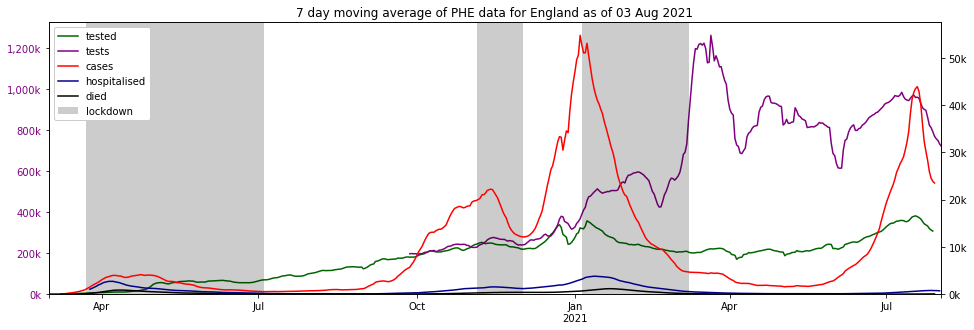

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

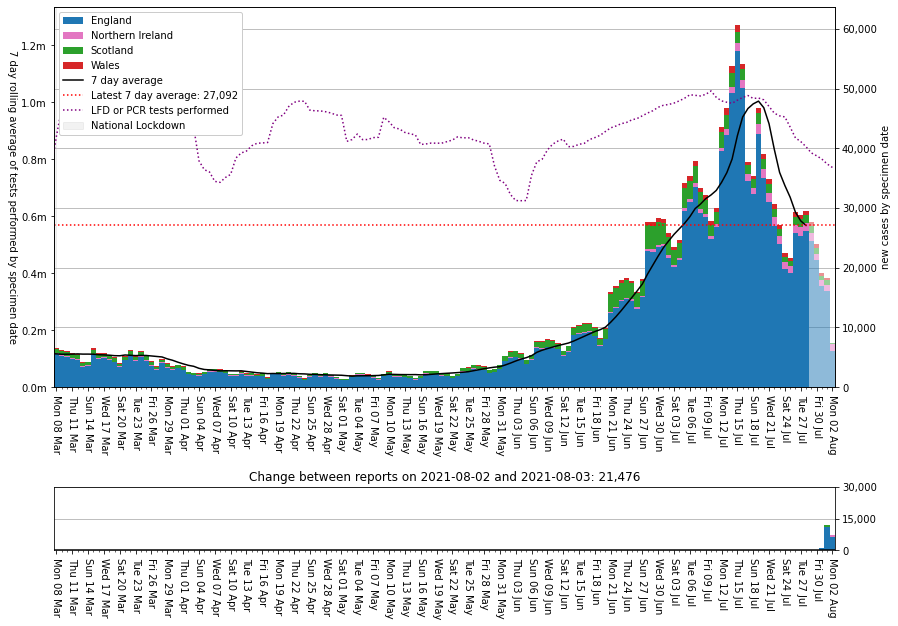

In [4]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b')

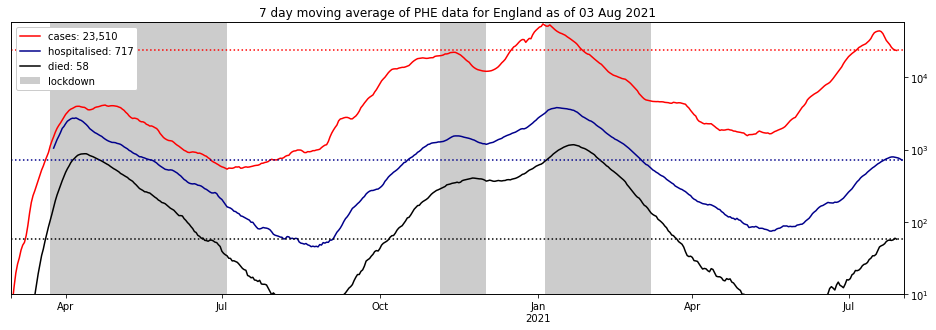

In [5]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

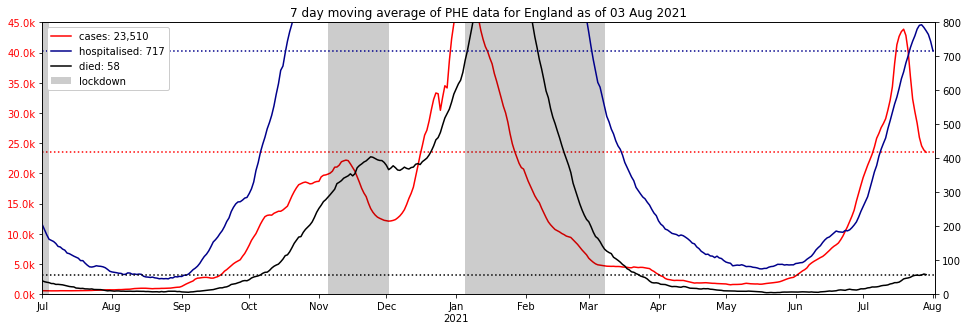

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=45_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=800)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,02 Aug 21,"+32,228,727","+39,366,485","+32,228,727","+94,540","+22,476","+94,540"
Northern Ireland,02 Aug 21,"+1,056,278","+1,220,430","+1,056,278","+7,683","+1,041","+7,683"
Scotland,02 Aug 21,"+3,231,331","+4,014,212","+3,231,331","+16,530","+1,716","+16,530"
Wales,02 Aug 21,"+2,073,996","+2,297,398","+2,073,996","+7,554",+881,"+7,554"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,32228727.0,39366485.0,7137758.0,56286961,57.257891,12.681015,30.061094
1,Northern Ireland,N92000002,1056278.0,1220430.0,164152.0,1893667,55.779501,8.668472,35.552027
2,Scotland,S92000003,3231331.0,4014212.0,782881.0,5463300,59.146139,14.329819,26.524042
3,Wales,W92000004,2073996.0,2297398.0,223402.0,3152879,65.781021,7.085651,27.133328


'partial: 46,898,525 (70.2%), full: 38,590,332'

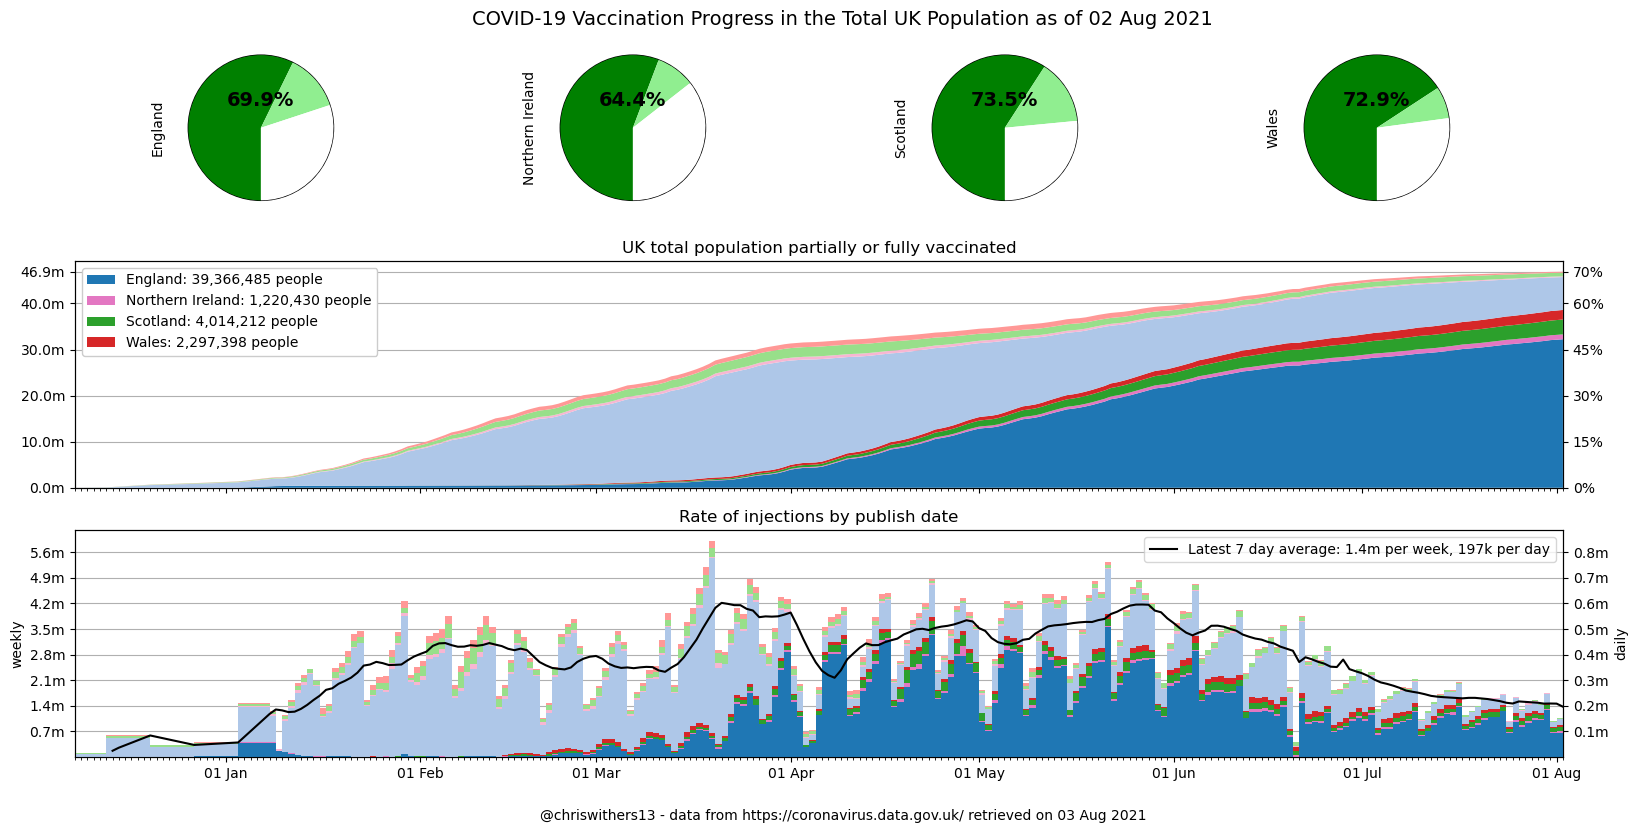

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

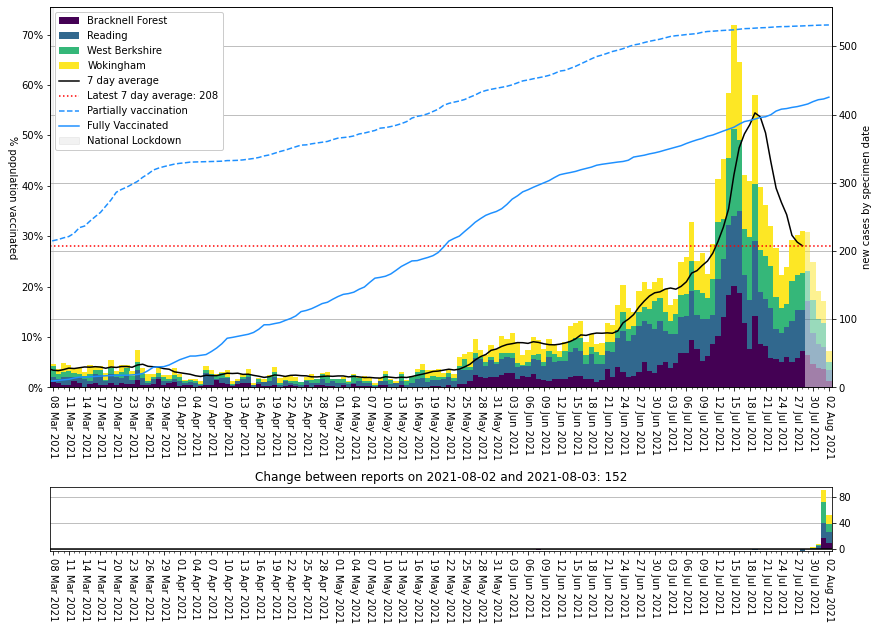

In [9]:
plot_areas(for_date, areas=my_areas, lines=population_vaccinated)

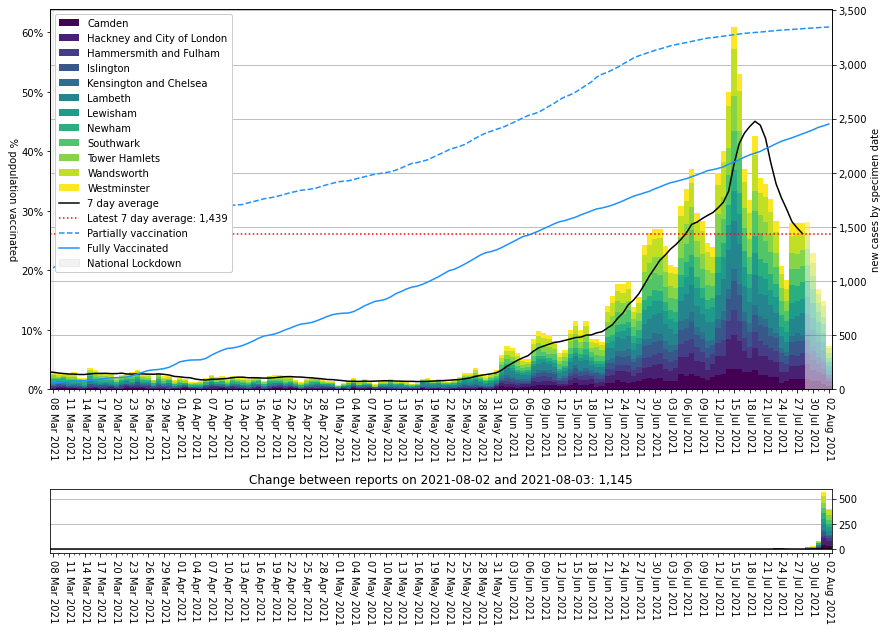

In [10]:
plot_areas(for_date, areas=london_areas, lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000138,Lincoln,668.687499,664.0,2021-08-02
N09000003,Belfast,542.873943,1865.0,2021-08-02
N09000005,Derry City and Strabane,501.044393,758.0,2021-08-02
E07000041,Exeter,496.936951,653.0,2021-08-02
N09000009,Mid Ulster,473.311429,703.0,2021-08-02
E06000010,"Kingston upon Hull, City of",468.861874,1218.0,2021-08-02
N09000010,"Newry, Mourne and Down",458.735830,832.0,2021-08-02
E06000058,"Bournemouth, Christchurch and Poole",458.097139,1811.0,2021-08-02
E08000019,Sheffield,433.271266,2534.0,2021-08-02


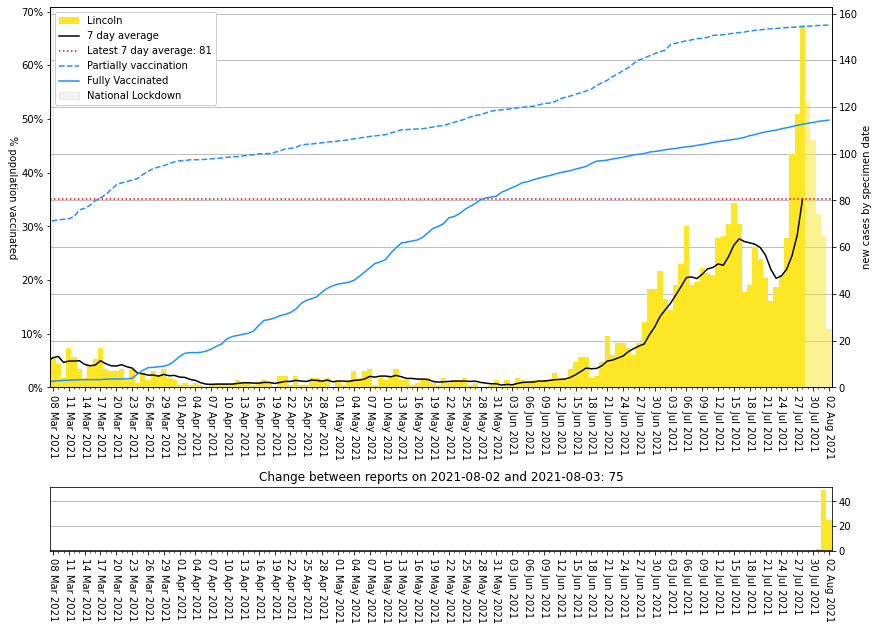

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,263.527574,3009.0,2021-08-02
E08000035,Leeds,329.702612,2615.0,2021-08-02
E08000019,Sheffield,433.271266,2534.0,2021-08-02
N09000003,Belfast,542.873943,1865.0,2021-08-02
E06000058,"Bournemouth, Christchurch and Poole",458.097139,1811.0,2021-08-02
E06000023,"Bristol, City of",362.771566,1681.0,2021-08-02
E08000003,Manchester,289.043480,1598.0,2021-08-02
E08000012,Liverpool,300.376273,1496.0,2021-08-02
E08000032,Bradford,255.105822,1377.0,2021-08-02


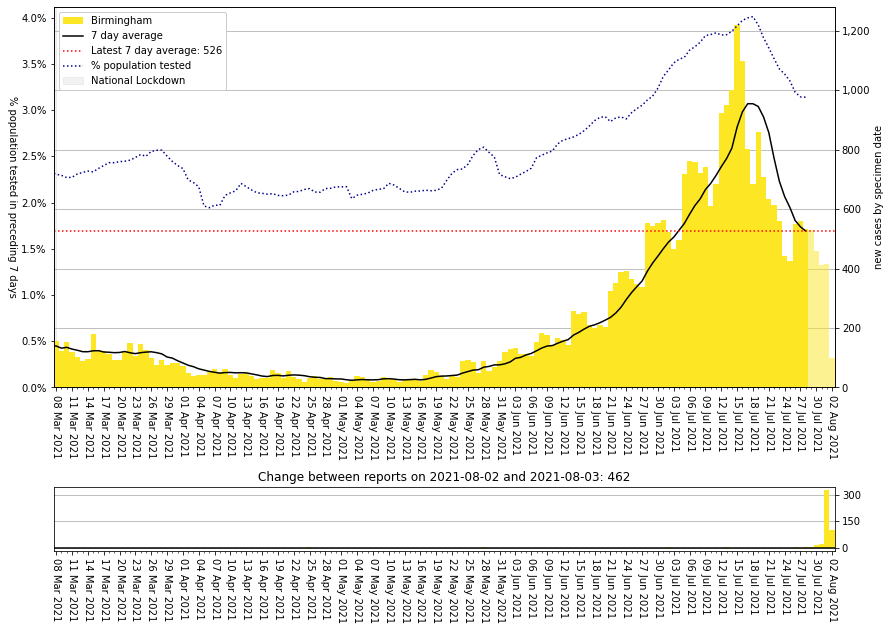

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 3.0
phe_max = 0.7

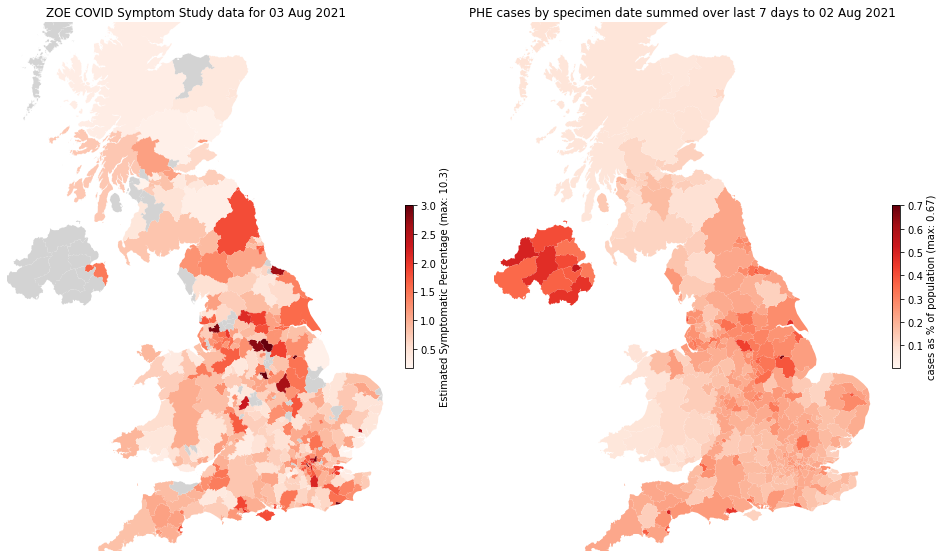

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...